# Esercizio 06.1
L'esercizio richiede di simulare un modello di Ising 1D con due algoritmi diversi: l'algoritmo di Gibbs e l'algoritmo di Metropolis.

I dati raccolti di magnetizzazione per particella ad $h=0.02$, suscettività per particella ad $h=0.0$, capacità termica per particella a $h=0.0$ e energia interna per particella ad $h=0.0$ sono poi confrontati con le soluzioni esatte del modello di Ising 1D. 

Il modello di Ising 1D  è un modello discreto che descrive $N$ spin disposti lungo una catena lineare (cioè in una dimensione), ciascuno dei quali può assumere solo due stati: $x_i=+1$ e $x_i=-1$.

In questo modello, l'energia di una particolare configurazione è data da:
$$
E = -J \sum_{i=1}^{N} s_i s_{i+1} - H \sum_{i=1}^{N} s_i
$$
dove $J$ è il coefficiente di accoppiamento tra spin, $H$ è il campo magnetico esterno.

# Algoritmo di Gibbs
Nell'algoritmo di Gibbs l'idea di base è di proporre una mossa, in questo caso flippare lo spin della particella $i$, in base alla sua probabilità condizionata. Dunque se tale probabilità risulta bassa il flip sarà poco probabile. Tale probabilità è calcolata solo sui primi vicini alla particella $i$ ed è pari a:
$$
p(s_i = \pm 1) = \frac{1}{1 + \exp\left(2 \beta s_i \left[J(s_{i-1} + s_{i+1}) + H\right]\right)}
$$
Con questo algoritmo le mosse sono sempre accettate, perché si estrae direttamente da una distribuzione condizionata corretta.

# Algoritmo di Metropolis
Nell'algoritmo di Metropolis una mossa viene proposta e si calcola la sua probabilità di accettazione. Se è molto piccola allora tale mossa verrà molto probabilmente rifiutata. Tale probabilità è pari a:
$$
P = \exp(-\beta \, \Delta E)
$$
con $\Delta E$ pari alla variazione di energia della mossa proposta. Con questo algoritmo quindi non tutte le mosse vengono accettate; verranno maggiormente accettate quelle mosse per cui si ha probabilità di accettazione alta.

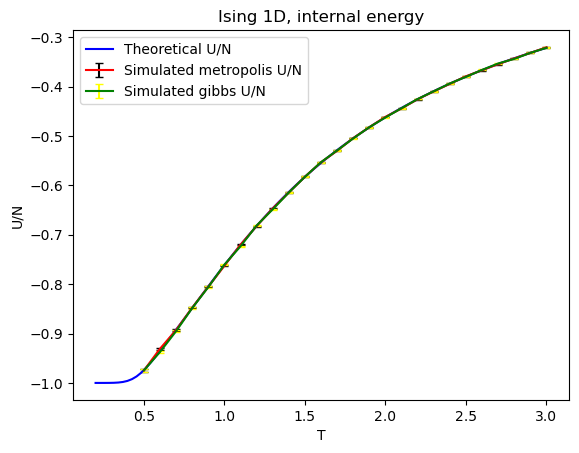

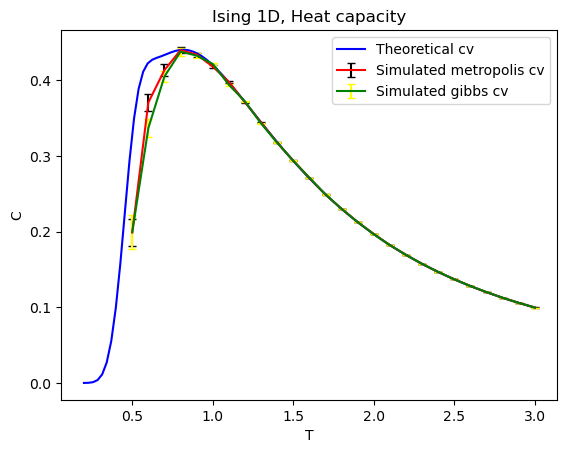

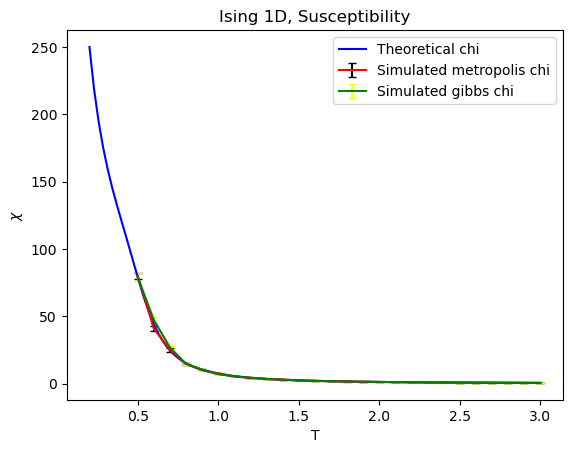

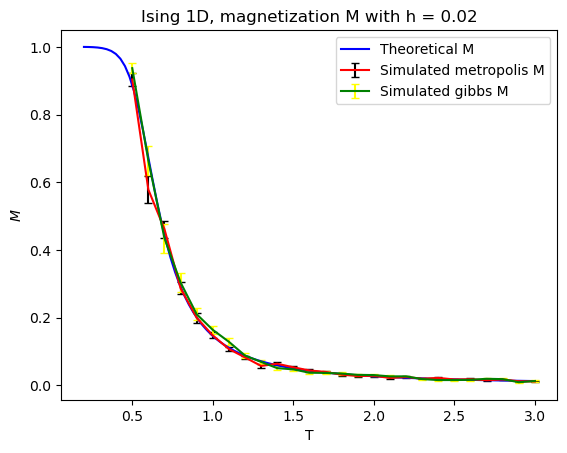

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#parametri curve teoriche
# Numero di punti in cui valutare la curva teorica 
points = 100
# Temperature tra 0.2 e 3.0 
T = np.linspace(0.2, 3.0, num=points)
# Inversa della temperatura: beta = 1/T
beta = 1 / T
# Costante di accoppiamento tra spin (J > 0 = ferromagnetico)
J = 1.0
# Numero di spin nel sistema (serve per le correzioni finite-size)
Ns = 50
# Calcolo di tanh(J / T), funzione iperbolica ricorrente nella soluzione esatta del modello di Ising 1D
th = np.tanh(J / T)
# th elevato alla Ns-esima potenza: tanh(J/T)^N 
thN = th ** Ns
# Calcolo di coth(J/T) = 1 / tanh(J/T)
ch = 1 / th

#carico tutti i dati da entrambe le simulazioni
data_m = np.loadtxt("metropolis/total_energy.dat", comments="#")
data1_m = np.loadtxt("metropolis/specific_heat.dat", comments="#")
data2_m = np.loadtxt("metropolis/susceptibility.dat", comments="#")
data3_m = np.loadtxt("metropolis/magnetization.dat", comments="#")
data_g = np.loadtxt("gibbs/total_energy.dat", comments="#")
data1_g = np.loadtxt("gibbs/specific_heat.dat", comments="#")
data2_g = np.loadtxt("gibbs/susceptibility.dat", comments="#")
data3_g = np.loadtxt("gibbs/magnetization.dat", comments="#")
#preparo gli array che li conterranno
x = []
y_internal_energy_m = []
y_internal_energy_g = []
error_internal_energy_m = []
error_internal_energy_g = []
y_specific_heat_m = []
y_specific_heat_g = []
error_specific_heat_m = []
error_specific_heat_g = []
y_chi_m = []
y_chi_g = []
error_chi_m = []
error_chi_g = []
y_M_m =[]
y_M_g =[]
error_M_m =[]
error_M_g =[]
#ciclo sulle temperature per riempire gli array. prendo l'ultima media cumulativa e l'ultima incertezza dei 20 blocchi di ogni simulazione a diversa T
for i in range(26):
    x.append(0.5+i*(0.1))#temperature della simulazione
    y_internal_energy_m.append(data_m[19+20*(i),2])
    y_internal_energy_g.append(data_g[19+20*(i),2])
    error_internal_energy_m.append(data_m[19+20*(i),3])
    error_internal_energy_g.append(data_g[19+20*(i),3])
    y_specific_heat_m.append(data1_m[19+20*(i),2])
    y_specific_heat_g.append(data1_g[19+20*(i),2])
    error_specific_heat_m.append(data1_m[19+20*(i),3])
    error_specific_heat_g.append(data1_g[19+20*(i),3])
    y_chi_m.append(data2_m[19+20*(i),2])
    y_chi_g.append(data2_g[19+20*(i),2])
    error_chi_m.append(data2_m[19+20*(i),3])
    error_chi_g.append(data2_g[19+20*(i),3])
    y_M_m.append(data3_m[19+20*(i),2])
    y_M_g.append(data3_g[19+20*(i),2])
    error_M_m.append(data3_m[19+20*(i),3])
    error_M_g.append(data3_g[19+20*(i),3])


# Formula dell'energia media per spin del modello di Ising 1D con N spin 
e = -J * (th + ch * thN) / (1 + thN)

#plotto l'energia interna per particella teorica e quella ottenuta con le simulazioni
plt.errorbar(x, y_internal_energy_m, yerr=error_internal_energy_m, fmt='-', label="Simulated metropolis U/N", color='red', ecolor='black', capsize=3)
plt.errorbar(x, y_internal_energy_g, yerr=error_internal_energy_g, fmt='-', label="Simulated gibbs U/N", color='green', ecolor='yellow', capsize=3)
plt.plot(T, e, label="Theoretical U/N", color='blue')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

plt.clf()

#cv in funzione di T teorico
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#plotto cv ottenuto con simulazioni e cv teorico
plt.errorbar(x, y_specific_heat_m, yerr=error_specific_heat_m, fmt='-', label="Simulated metropolis cv", color='red', ecolor='black', capsize=3)
plt.errorbar(x, y_specific_heat_g, yerr=error_specific_heat_g, fmt='-', label="Simulated gibbs cv", color='green', ecolor='yellow', capsize=3)
plt.plot(T, heat, label="Theoretical cv", color='blue')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()
# Nota che cv è la varianza dell'energia. A basse T le transizioni energetiche sono rare, quindi le configurazioni esplorate sono molto simili e poche e quindi le fluttuazioni di E sono poco rappresentative e sottostimate -> a basse T cv simulato si discosta da cv teorico e risulta sottostimato, essendo sottostimate le fluttuazioni di E e quindi anche la sua varianza che è legata a cv.
plt.clf()

#suscettività in funzione di T teorica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#plotto suscettività ottenuta con simulazioni e teorica
plt.errorbar(x, y_chi_m, yerr=error_chi_m, fmt='-', label="Simulated metropolis chi", color='red', ecolor='black', capsize=3)
plt.errorbar(x, y_chi_g, yerr=error_chi_g, fmt='-', label="Simulated gibbs chi", color='green', ecolor='yellow', capsize=3)
plt.plot(T, X, label="Theoretical chi", color='blue')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel(r'$\chi$')
plt.legend()
plt.show()

plt.clf()

#magnetizzazione in funzione di T teorica
h=0.02 #campo esterno

l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

#plotto magnetizzazione ottenuta con simulazioni e teorica
plt.errorbar(x, y_M_m, yerr=error_M_m, fmt='-', label="Simulated metropolis M", color='red', ecolor='black', capsize=3)
plt.errorbar(x, y_M_g, yerr=error_M_g, fmt='-', label="Simulated gibbs M", color='green', ecolor='yellow', capsize=3)
plt.plot(T, M, label="Theoretical M", color='blue')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.show()

## Analisi dei grafici
I grafici mostrano insieme le grandezze misurate con le simulazioni basate sull'algoritmo di Gibbs e sull'algoritmo di Metropolis e le curve teoriche ottenute dalla soluzione analitiche del modello di Ising 1D.

## 1. Energia interna $\frac{U}{N}$ con $h=0.0$
La soluzione analitica è:
$$
\frac{U(N,T)}{N} = -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
L'energia interna aumenta all'aumentare di $T$ e cioè all'aumentare del disordine del sistema. Si osserva un pressocchè perfetto accordo tra curva teorica, simulazione con Gibbs e simulazione con Metropolis.

## 2. Suscettività $\chi$ con $h=0.0$
La soluzione analitica è:
$$
\chi(N,T) = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
A basse T gli spin sono allineati dunque il sistema risponde fortemente a un possibile campo magnetico esterno e pertanto la suscettività, che misura quanto la magnetizzazione cambia in risposta a un piccolo campo esterno, diverge.

Si osserva un perfetto accordo tra simulazione con Gibbs, con Metropolis e curva teorica sebbene con leggere fluttuazioni a T basse. Il motivo di queste leggere discrepanze è che gli algoritmi a basse temperature fanno fatica ad esplorare appieno tutti gli stati possibili, dunque ci possono essere fluttuazioni più o meno marcate che generano incertezze più o meno grandi.

## 3. Capacità termica $\frac{C}{N}$ con $h=0.0$
La soluzione analitica è:
$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$
Si osserva un massimo a $T \approx 1$. 

In questo caso l'accordo tra simulazioni e curva teorica è parziale. In particolare a basse temperature sono presenti marcate fluttuazioni e un'evidente sottostima. La capacità termica è proporzionale alla varianza dell'energia (fluttuazioni termiche) e
a basse temperature le transizioni di energia diventano rare (flip quasi impossibili). Di conseguenza, le configurazioni esplorate sono molto simili tra loro: il sistema resta "bloccato" in uno stato quasi ordinato. Questo causa una sottostima delle fluttuazioni di energia, e quindi della sua varianza, portando a valori simulati di $C$ inferiori al valore teorico. All’aumentare della temperatura, le fluttuazioni sono meglio esplorate, il campionamento migliora, e $C$ converge al comportamento teorico.

## 4. Magnetizzazione $\frac{M}{N}$ con $h=0.02$
La soluzione analitica è:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$
A basse temperature gli spin si allineano e dunque $\frac{M}{N} \to 1$ per $T \to 0$. 

Si osserva un perfetto accordo tra simulazioni e curva teorica sebbene con leggere fluttuazioni con marcata incertezza a basse $T$. Il motivo di queste leggere discrepanze è che gli algoritmi a basse temperature fanno fatica ad esplorare appieno tutti gli stati possibili, dunque ci possono essere fluttuazioni più o meno marcate che generano incertezze più o meno grandi.

## Conclusioni
Entrambi gli algoritmi mostrano un ottimo accordo con la curva teorica, confermando l'efficacia e l'affidabilità delle due tecniche di simulazione. Tuttavia è evidente la maggior discrepanza a basse temperature dovute alla maggior difficoltà degli algoritmi nell'esplorare meglio lo spazio delle configurazioni possibili. Una possibile correzione consiste nell'aumentare gli steps dei singoli blocchi delle simulazioni in modo da permettere agli algoritmi di esplorare meglio lo spazio delle fasi.